In [54]:
etc = pd.read_csv('youtube_hiphop1.csv',encoding='utf-8')
etc1 = pd.read_csv('youtube_hiphop2.csv',encoding='utf-8')
etc2 = pd.read_csv('youtube_hiphop3.csv',encoding='utf-8')

etc = pd.concat([etc, etc1])
etc = pd.concat([etc, etc2])
etc

,Unnamed: 0,ID,Comment
0,0,큐리,태풍바비온대서기념으로보러옴.
1,1,꧁꧂꧁꧂꧁꧂꧁꧂꧁꧂꧁꧂꧁꧂꧁꧂꧁꧂꧁꧂,체크해보겠습니다2020하반기는손을들어주세요
2,2,FrédéricFrançoisChopin,이건ㅅㅂ쇼팽인내가들어도가슴이웅장해진다
3,3,ᄉᄒ,아니어떻게고등학생이무대장악력이ㅋㅋㅋ
4,4,랄라,진짜레전드인건바비가저무대할때나이가19살이었다는거임ㅋㅋㅋㅋㅋ요즘고등래퍼라는프로가생겨서...
...,...,...,...
1575,1575,Herring,지금은뭐하고살아요?
1576,1576,0222chan,아니며번을보고봐도행주는곡도곡이지만무대구성이소름돋게놀라워
1577,1577,GG,이건다시봐도전설이다
1578,1578,김지후,스윙스에대한반응이나여론이좋지는않지만레드썬무대보고나니까국힙에한획을그은인물임은알것같다....


In [37]:
len(etc)

3820

In [38]:
etc2=list(etc.Comment)
etc2[0:3]

['태풍바비온대서기념으로보러옴.', '체크해보겠습니다2020하반기는손을들어주세요', '이건ㅅㅂ쇼팽인내가들어도가슴이웅장해진다']

In [39]:
etc2=list(etc.Comment)
etc2[0:2]

['태풍바비온대서기념으로보러옴.', '체크해보겠습니다2020하반기는손을들어주세요']

In [40]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:3]

['태풍바비온대서기념으로보러옴', '체크해보겠습니다2020하반기는손을들어주세요', '이건ㅅㅂ쇼팽인내가들어도가슴이웅장해진다']

In [41]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

In [42]:
import time
import datetime
start = time.time()

In [43]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

0:02:43


In [44]:
from gensim import corpora, models 
import gensim

In [45]:
high_score_reviews = dataset

In [46]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [47]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


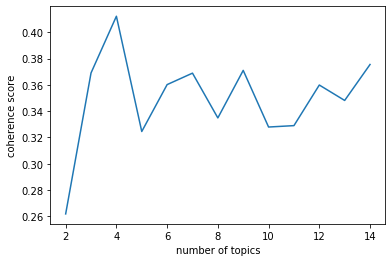

In [48]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [49]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

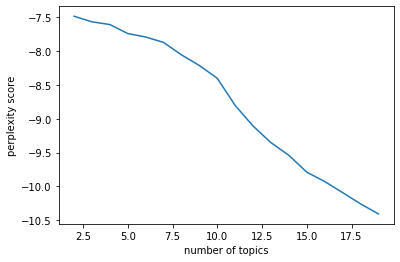

In [50]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [51]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4,alpha=0.2,id2word = dictionary)

In [52]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.041*"진짜" + 0.031*"스윙스" + 0.019*"돈까스" + 0.018*"무대" + 0.016*"지코" + 0.012*"레전드" + 0.010*"존나" + 0.010*"실눈" + 0.009*"노래" + 0.008*"우승" + 0.008*"지금" + 0.007*"역시" + 0.007*"바비" + 0.007*"순간" + 0.006*"계속" + 0.006*"소름" + 0.005*"간지" + 0.005*"소리" + 0.005*"분위기" + 0.005*"카메라"'),
 (1,
  '0.053*"행주" + 0.037*"무대" + 0.030*"스윙스" + 0.023*"사람" + 0.020*"바비" + 0.018*"진짜" + 0.012*"레드" + 0.008*"비트" + 0.008*"년월" + 0.007*"생각" + 0.007*"노래" + 0.006*"보고" + 0.006*"실력" + 0.006*"처음" + 0.006*"가사" + 0.005*"표정" + 0.005*"존나" + 0.005*"레전드" + 0.005*"힙합" + 0.004*"연결고리"'),
 (2,
  '0.021*"소름" + 0.018*"무대" + 0.017*"바비" + 0.017*"진짜" + 0.012*"시즌" + 0.011*"힙합" + 0.007*"다시" + 0.007*"사람" + 0.007*"음원" + 0.007*"라이브" + 0.006*"지금" + 0.006*"최고" + 0.006*"레전드" + 0.006*"댄서" + 0.006*"출석" + 0.006*"볼때" + 0.006*"왼쪽" + 0.005*"조명" + 0.005*"스윙스" + 0.005*"생각"'),
 (3,
  '0.017*"무대" + 0.010*"진짜" + 0.009*"출첵" + 0.009*"쇼미더머니" + 0.008*"여기" + 0.008*"최고" + 0.006*"도끼" + 0.006*"힙합" + 0.006*"요즘" + 0.006*"레전드" + 0.005*"소름" + 0.005*"역대" + 0.005*"혼자" + 

In [53]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.092199  0.072566       1        1  31.680492
2     -0.018557  0.009618       2        1  29.549753
0     -0.030036 -0.107944       3        1  23.946936
3      0.140792  0.025760       4        1  14.822820, topic_info=     Term        Freq       Total Category  logprob  loglift
877    행주  253.000000  253.000000  Default  30.0000  30.0000
1514  돈까스   70.000000   70.000000  Default  29.0000  29.0000
217   스윙스  280.000000  280.000000  Default  28.0000  28.0000
982    지코   76.000000   76.000000  Default  27.0000  27.0000
64     사람  153.000000  153.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
1      바비    9.050797  208.718216   Topic4  -5.5077  -1.2291
172    우승    7.592996   74.711533   Topic4  -5.6834  -0.3774
104    지금    7.595436   83.003288   Topic4  -5.6830  -0.4823
17     래퍼    6.626760   50.693195   Topic4  -5.8195  -0.1257
90     관객    6.281912   37.413063   Topic4  -5.8729   0.1247

[283 rows x 6 columns], token_table=      Topic      Freq Term
term                      
89        1  0.601402   가사
89        2  0.208178   가사
89        3  0.161916   가사
89        4  0.023131   가사
398       2  0.159634   가수
...     ...       ...  ...
2444      3  0.937032   흑우
61        1  0.233901   힙합
61        2  0.499698   힙합
61        3  0.127583   힙합
61        4  0.148846   힙합

[459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])